In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.pyplot import figure
import matplotlib.cm as cm


In [169]:
df = pd.read_csv("./book.csv", delimiter=";").transpose()
df

,0,1,2,3,4,5
Алгоритм,SVC,RandomForestClassifier,LogisticRegression,KNeighborsClassifier,SGDClassifier,MultinomialNB
CIFAR-10 Точность,46,44,29,28,24,23
CIFAR-10 Время,1986.03,6296.49,557.37,16.5,1004.74,0.51
Drom.ru Точность,24,25,21,21,20,16
Drom.ru Время,361.42,1340.82,534.2,3.18,1431.24,0.3
Stanford cars Точность,35,29,22,28,24,29
Stanford cars Время,1.06,71.4,12.69,0.11,32.73,0.05


In [170]:
items_list = list(df.to_dict().values())
items_list

[{'Алгоритм': 'SVC',
  'CIFAR-10 Точность': 46,
  'CIFAR-10 Время': 1986.03,
  'Drom.ru Точность': 24,
  'Drom.ru Время': 361.42,
  'Stanford cars Точность': 35,
  'Stanford cars Время': 1.06},
 {'Алгоритм': 'RandomForestClassifier',
  'CIFAR-10 Точность': 44,
  'CIFAR-10 Время': 6296.49,
  'Drom.ru Точность': 25,
  'Drom.ru Время': 1340.82,
  'Stanford cars Точность': 29,
  'Stanford cars Время': 71.4},
 {'Алгоритм': 'LogisticRegression',
  'CIFAR-10 Точность': 29,
  'CIFAR-10 Время': 557.37,
  'Drom.ru Точность': 21,
  'Drom.ru Время': 534.2,
  'Stanford cars Точность': 22,
  'Stanford cars Время': 12.69},
 {'Алгоритм': 'KNeighborsClassifier',
  'CIFAR-10 Точность': 28,
  'CIFAR-10 Время': 16.5,
  'Drom.ru Точность': 21,
  'Drom.ru Время': 3.18,
  'Stanford cars Точность': 28,
  'Stanford cars Время': 0.11},
 {'Алгоритм': 'SGDClassifier',
  'CIFAR-10 Точность': 24,
  'CIFAR-10 Время': 1004.74,
  'Drom.ru Точность': 20,
  'Drom.ru Время': 1431.24,
  'Stanford cars Точность': 24,
  'St

### Выводим все данные

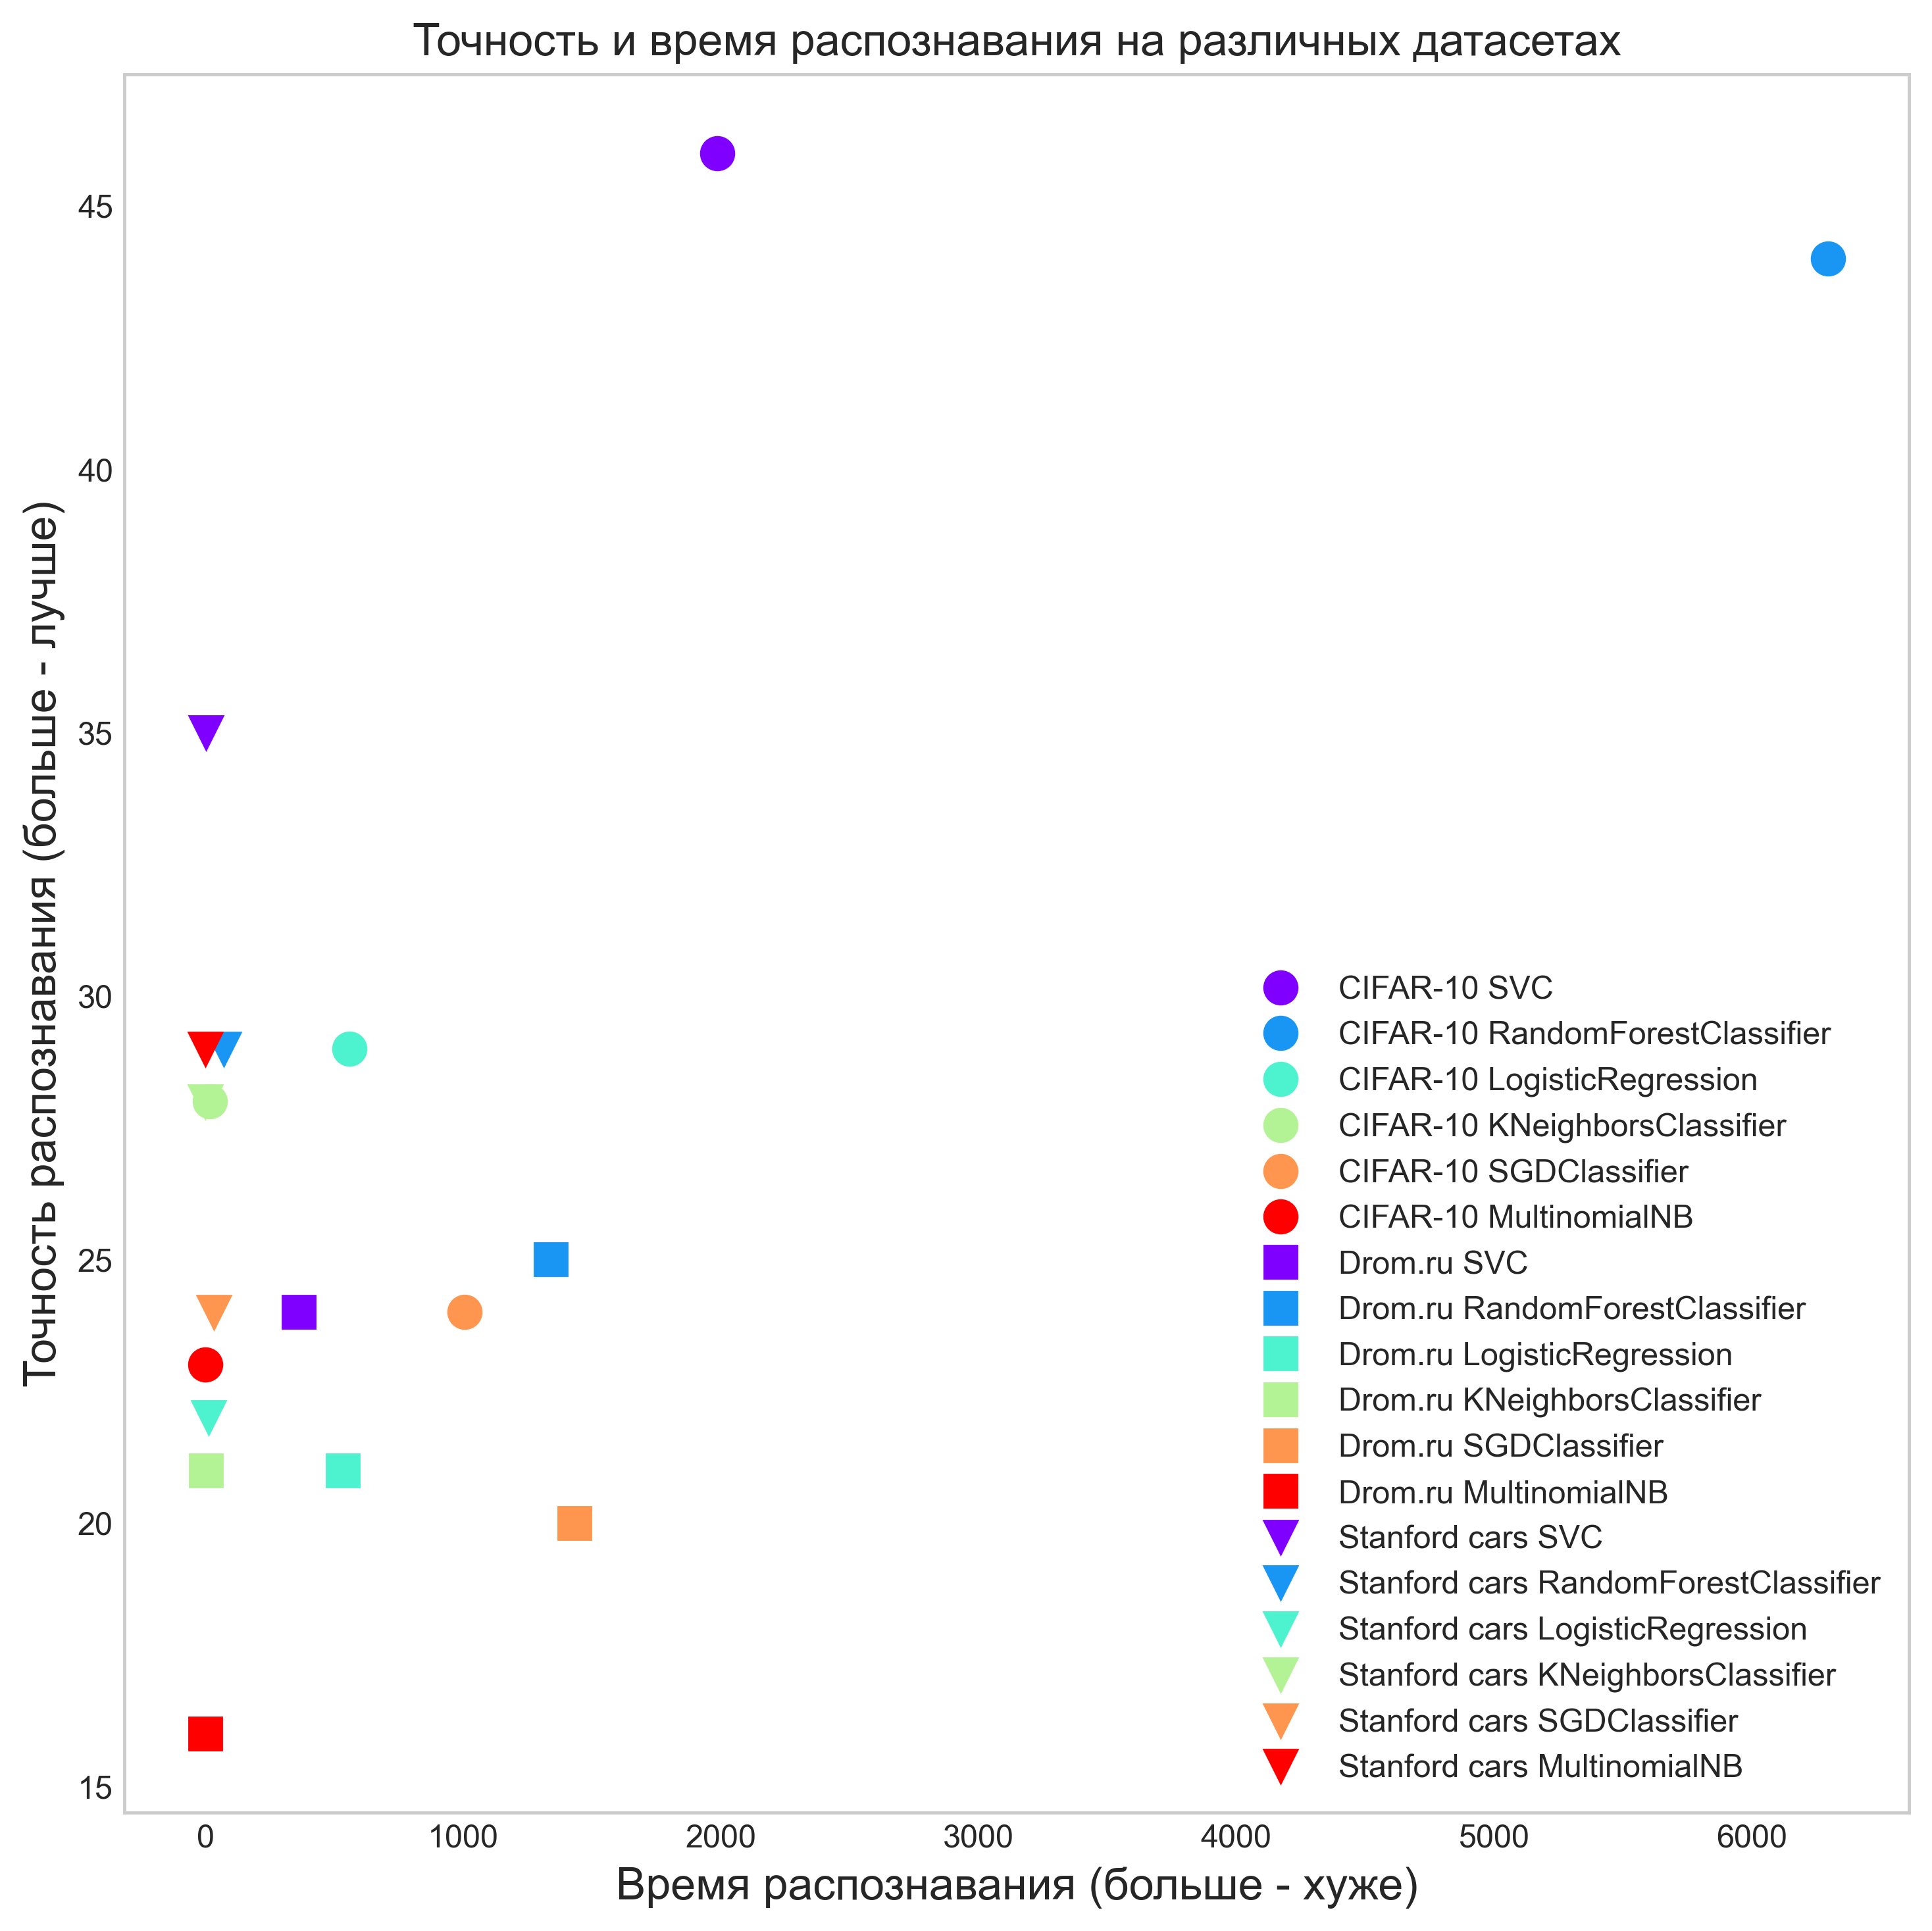

In [171]:
figure(figsize=(10, 10), dpi=350)
plt.grid(False)

colors = cm.rainbow(np.linspace(0, 1, len(items_list)))

for marker, dataset_name in zip(["o","s","v"], ["CIFAR-10", "Drom.ru", "Stanford cars"]):
    
    for c, item in zip(colors,items_list):
        
        x = item[f"{dataset_name} Время"]
        y = item[f"{dataset_name} Точность"]
        plt.plot(x,y, marker, label=f"{dataset_name} {item['Алгоритм']}", color=c, markersize=10)


plt.title('Точность и время распознавания на различных датасетах', fontsize=14)
plt.xlabel('Время распознавания (больше - хуже)', fontsize=14)
plt.ylabel('Точность распознавания (больше - лучше)', fontsize=14)

plt.legend(numpoints=1)
plt.savefig('./img/acc_time_plot1.png', bbox_inches='tight')

### Выводим только CIFAR-10 + глубокое обучение

In [174]:
ANN_time = 1770
ANN_acc = 58
CNN_time = 189
CNN_acc = 70

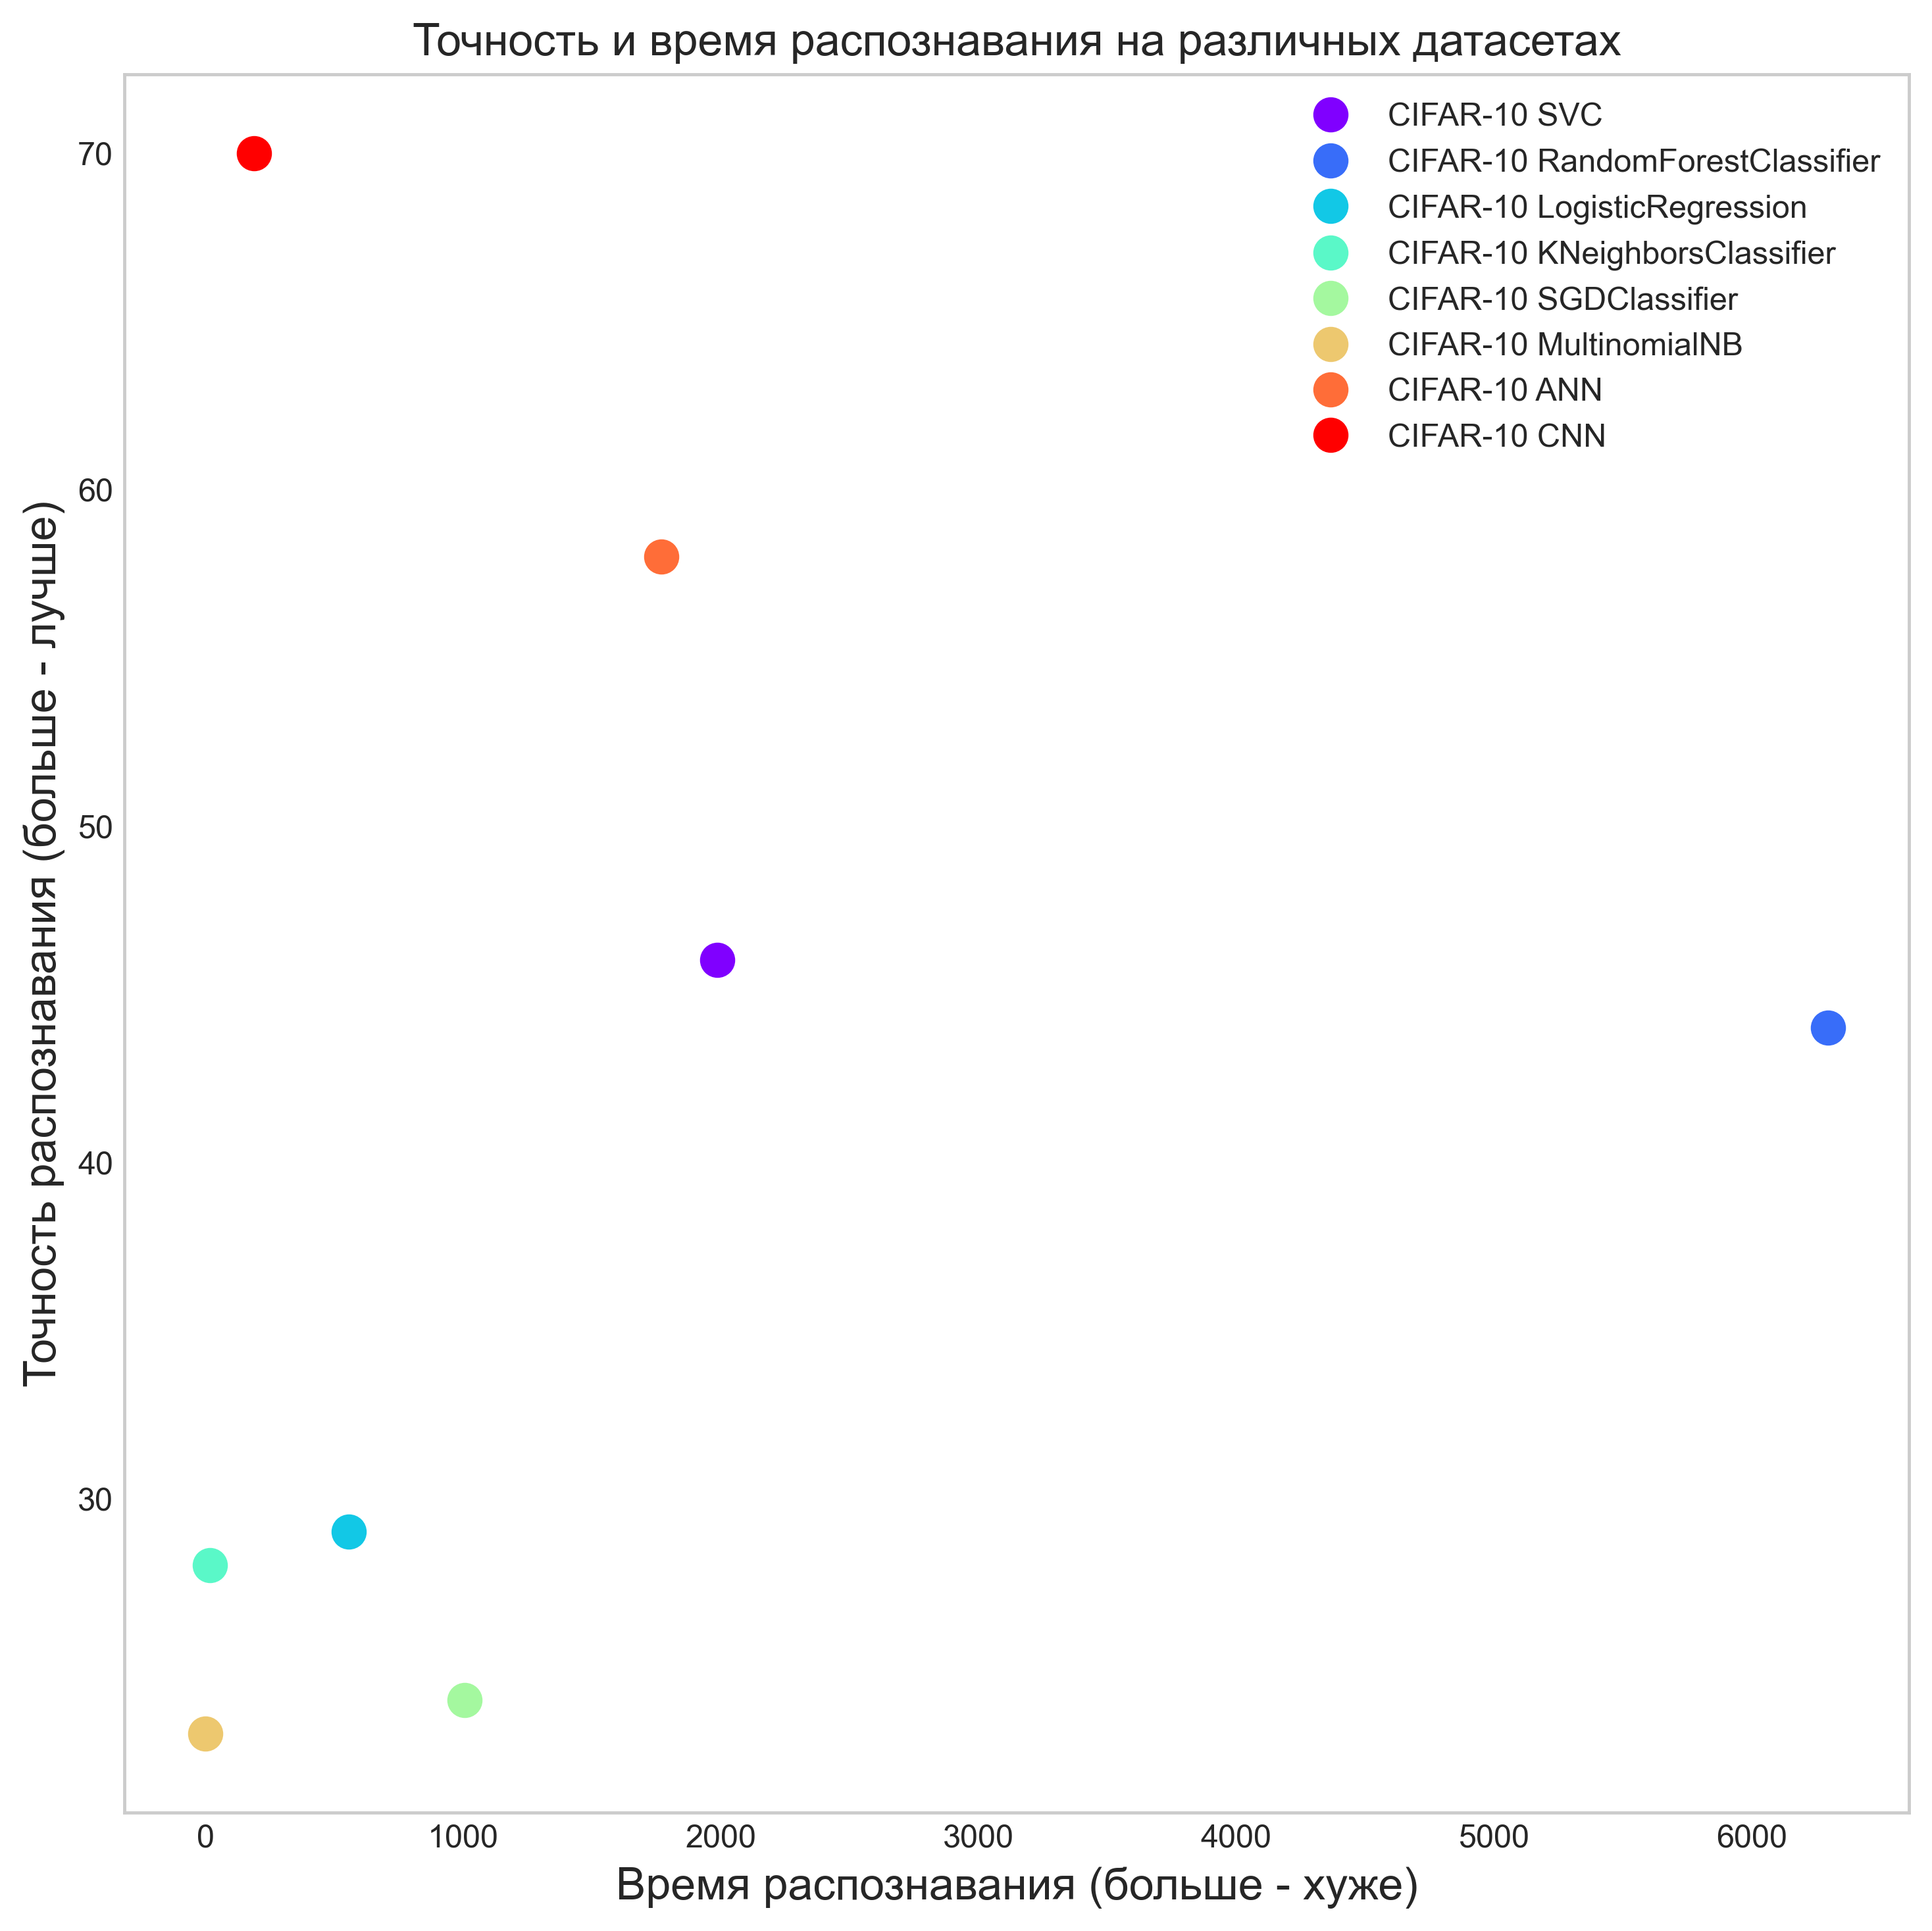

In [178]:
figure(figsize=(10, 10), dpi=350)
plt.grid(False)

colors = cm.rainbow(np.linspace(0, 1, len(items_list)+2))


marker = "o"
for c, item in zip(colors,items_list):

    x = item[f"CIFAR-10 Время"]
    y = item[f"CIFAR-10 Точность"]
    plt.plot(x,y, marker, label=f"CIFAR-10 {item['Алгоритм']}", color=c, markersize=10)

#Добавляем данные по алгоритмам глубокого обучения
plt.plot(ANN_time,ANN_acc, marker, label=f"CIFAR-10 ANN", color=colors[6], markersize=10)
plt.plot(CNN_time,CNN_acc, marker, label=f"CIFAR-10 CNN", color=colors[7], markersize=10)

plt.title('Точность и время распознавания на различных датасетах', fontsize=14)
plt.xlabel('Время распознавания (больше - хуже)', fontsize=14)
plt.ylabel('Точность распознавания (больше - лучше)', fontsize=14)

plt.legend(numpoints=1)
plt.savefig('./img/acc_time_plot2.png', bbox_inches='tight')